In [1]:
import numpy as np


Loading images and labes with below function which decompress from the .gz datasets

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from 'path'"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

Now, let's explore de dataset: trainset, testset, images and labels

In [3]:
Xtrain, Ytrain = load_mnist('dataset/')

In [4]:
Xtest, Ytest = load_mnist('dataset/', kind= 't10k')

In [5]:
import matplotlib.pyplot as plt

In [6]:
print(len(Xtrain))
print(len(Ytrain))

60000
60000


In [7]:
img = Xtrain[1]

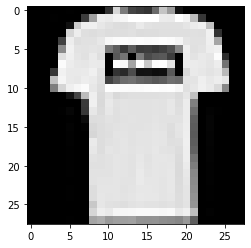

In [8]:
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [9]:
Ytrain.shape

(60000,)

In [10]:
Ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
len(Ytest)

10000

In [12]:
Xtest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
import pandas as pd
from keras.utils import to_categorical

In [15]:
#Extract validation data for model fitting and evaluation, splitting the trainset. 
(Xtrain, Xval) = Xtrain[6000:], Xtrain[:6000]
(Ytrain, Yval) = Ytrain[6000:], Ytrain[:6000]

#Reshape input data 

Xtrain = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1)
Xval = Xval.reshape(Xval.shape[0], 28, 28, 1)
Xtest = Xtest.reshape(Xtest.shape[0], 28, 28, 1)

In [23]:
Ytrain = to_categorical(Ytrain, 10)
Yval = to_categorical(Yval, 10)
Ytest = to_categorical(Ytest, 10)

In [16]:
print(len(Xtrain))
print(len(Ytrain))

54000
54000


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import tensorflow as tf
from keras import layers

In [54]:
model_1 = Sequential()

model_1.add(Flatten(input_shape=(28,28)))
model_1.add(Dense(units = 256, activation='relu'))
model_1.add(Dense(units = 10, activation='softmax'))

model_1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [56]:
model_1.fit(Xtrain,
         Ytrain,
         batch_size=64,
         epochs=10,
         validation_data=(Xval, Yval))

Epoch 1/10
844/844 [==============================] - 2s 2ms/step - loss: 16.0027 - accuracy: 0.7130 - val_loss: 0.7561 - val_accuracy: 0.7912
Epoch 2/10
844/844 [==============================] - 1s 1ms/step - loss: 0.6461 - accuracy: 0.7970 - val_loss: 0.5874 - val_accuracy: 0.8168
Epoch 3/10
844/844 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.8208 - val_loss: 0.5653 - val_accuracy: 0.8212
Epoch 4/10
844/844 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.8312 - val_loss: 0.5473 - val_accuracy: 0.8345
Epoch 5/10
844/844 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.8446 - val_loss: 0.5005 - val_accuracy: 0.8313
Epoch 6/10
844/844 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.8434 - val_loss: 0.5141 - val_accuracy: 0.8388
Epoch 7/10
844/844 [==============================] - 1s 2ms/step - loss: 0.4199 - accuracy: 0.8477 - val_loss: 0.4853 - val_accuracy: 0.8422
Epoch

In [82]:
results_1 = model_1.evaluate(Xtest, Ytest, verbose=0)
print('Loss: ', results_1[0])
print('Acc: ', results_1[1])

Loss:  0.46648284792900085
Acc:  0.8422999978065491


In [30]:
from keras.layers import Dropout

In [31]:
model = Sequential()

#Input_size = 64
model.add(Conv2D(filters=64, kernel_size=2, padding='same', 
                 activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [32]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [33]:
model.fit(Xtrain,
         Ytrain,
         batch_size=64,
         epochs=10,
         validation_data=(Xval, Yval))

Epoch 1/10
844/844 [==============================] - 34s 40ms/step - loss: 3.8929 - accuracy: 0.5865 - val_loss: 0.4781 - val_accuracy: 0.8245
Epoch 2/10
844/844 [==============================] - 32s 38ms/step - loss: 0.5887 - accuracy: 0.7788 - val_loss: 0.4123 - val_accuracy: 0.8447
Epoch 3/10
844/844 [==============================] - 37s 44ms/step - loss: 0.5098 - accuracy: 0.8108 - val_loss: 0.3537 - val_accuracy: 0.8697
Epoch 4/10
844/844 [==============================] - 30s 36ms/step - loss: 0.4590 - accuracy: 0.8281 - val_loss: 0.3370 - val_accuracy: 0.8750
Epoch 5/10
844/844 [==============================] - 30s 35ms/step - loss: 0.4329 - accuracy: 0.8396 - val_loss: 0.3127 - val_accuracy: 0.8890
Epoch 6/10
844/844 [==============================] - 32s 38ms/step - loss: 0.4099 - accuracy: 0.8505 - val_loss: 0.3041 - val_accuracy: 0.8870
Epoch 7/10
844/844 [==============================] - 30s 36ms/step - loss: 0.3951 - accuracy: 0.8537 - val_loss: 0.2954 - val_accuracy:

In [37]:
results = model.evaluate(Xtest, Ytest, verbose=0)
print('Loss: ', results[0])
print('Acc: ', results[1])

Loss:  0.30133935809135437
Acc:  0.8910999894142151


In [61]:
predictions = model.predict(Xtest)

In [76]:
value = 156
np.argmax(predictions[value])

4

In [78]:
Ytest[value]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

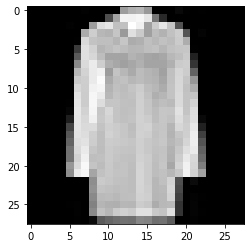

In [81]:
plt.imshow(Xtest[value].reshape(28,28), cmap ='Greys_r')

In [ ]:
def plot_image(i, pred_arr, label, image):
    pre